In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.DataFrame()
df2024 = pd.read_csv("Services/services-2024.csv")
df2025_1 = pd.read_csv("Services/services-2025-01.csv")
df2025_2 = pd.read_csv("Services/services-2025-02.csv")
df2025_3 = pd.read_csv("Services/services-2025-03.csv")
df2025_4 = pd.read_csv("Services/services-2025-04.csv")
df2025_5 = pd.read_csv("Services/services-2025-05.csv")
df2025_6 = pd.read_csv("Services/services-2025-06.csv")
df2025_7 = pd.read_csv("Services/services-2025-07.csv")
df2025_8 = pd.read_csv("Services/services-2025-08.csv")
df2025_9 = pd.read_csv("Services/services-2025-09.csv")
df2025_10 = pd.read_csv("Services/services-2025-10.csv")

stations_to_keep = ["Bad Bentheim", 'Oldenzaal', 'Hengelo Oost', 'Hengelo', 'Borne', 'Almelo de Riet', 'Almelo', 'Wierden', 'Rijssen', 
                    'Holten', 'Deventer Colmschate', 'Deventer', 'Twello', 'Apeldoorn Osseveld', 'Apeldoorn', 'Hoevelaken', 'Amersfoort Centraal', 
                    'Barneveld Noord', 'Hengelo Gezondheidspark', 'Delden', 'Goor', 'Nijverdal', 'Enschede', 'Enschede Kennispark']
trains_to_keep = [140, 142, 144, 146, 148, 240, 242, 1532, 1728, 1730, 3622, 3624, 7028, 7030, 7032, 7928, 7930, 7932, 17930, 
                  20354, 20358, 31228, 31230, 31232, 31314, 31316, 31318, 31418, 31420]
dataframes_to_add = [df2024, df2025_1, df2025_2, df2025_3, df2025_4, df2025_5, df2025_6, df2025_7, df2025_8, df2025_9, df2025_10]

for i in dataframes_to_add:
    i = i[i['Service:Train number'].isin(trains_to_keep)]
    i = i[i['Stop:Station name'].isin(stations_to_keep)]
    df = pd.concat([df, i], ignore_index=True)

df.info()
df.to_csv("Services/services-peak-trains-(possible-influence-by-242).csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90715 entries, 0 to 90714
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Service:RDT-ID                90715 non-null  int64  
 1   Service:Date                  90715 non-null  object 
 2   Service:Type                  90715 non-null  object 
 3   Service:Company               90715 non-null  object 
 4   Service:Train number          90715 non-null  int64  
 5   Service:Completely cancelled  90715 non-null  bool   
 6   Service:Partly cancelled      90715 non-null  bool   
 7   Service:Maximum delay         90715 non-null  int64  
 8   Stop:RDT-ID                   90715 non-null  int64  
 9   Stop:Station code             90715 non-null  object 
 10  Stop:Station name             90715 non-null  object 
 11  Stop:Arrival time             83305 non-null  object 
 12  Stop:Arrival delay            83305 non-null  float64
 13  S

In [5]:
df_delay = {}
arrival_amersfoort_1730 = {}
arrival_amersfoort_1732 = {}

for i in range(60):
    late_rows = df[
        (df['Stop:Station name'] == 'Bad Bentheim') &
        (df['Stop:Departure delay'] == i) &
        (df['Service:Train number'] == 242)
    ]

    dagen = late_rows['Service:Date'].unique()
    subset = df[df['Service:Date'].isin(dagen)]

    df_delay[i] = subset  # opslaan

    #1730
    arrival_amersfoort_1730[i] = df_delay[i][(df_delay[i]['Stop:Station name'] == 'Amersfoort Centraal') & (df_delay[i]['Service:Train number'] == 1730)]

    #1732
    arrival_amersfoort_1732[i] = df_delay[i][(df_delay[i]['Stop:Station name'] == 'Amersfoort Centraal') & (df_delay[i]['Service:Train number'] == 1732)]

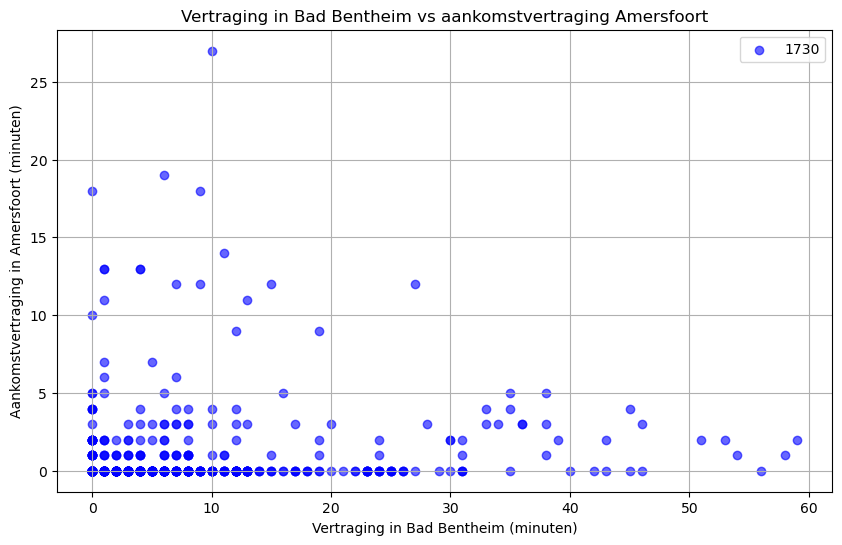

In [6]:
# Lijsten om gemiddeldes op te slaan
plt.figure(figsize=(10,6))

# Lijst van treinen en kleuren
trains = [(arrival_amersfoort_1730, 'blue', '1730')]

for train_data, color, label in trains:
    for i in range(60):
        if not train_data[i].empty:
            y_values = train_data[i]['Stop:Arrival delay']
            x_values = [i] * len(y_values)
            plt.scatter(x_values, y_values, color=color, alpha=0.6, label=label if i==0 else "")

plt.xlabel('Vertraging in Bad Bentheim (minuten)')
plt.ylabel('Aankomstvertraging in Amersfoort (minuten)')
plt.title('Vertraging in Bad Bentheim vs aankomstvertraging Amersfoort')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
trains_to_keep2 = [242, 240, 148, 146, 144, 142, 140]

df_delay = {}
arrival_amersfoort = {}
percentages = {}

for i in range(60):  # departure delay in BB
    for train in trains_to_keep2:

        # vind ritten met vertrekvertraging i
        late_rows = df[
            (df['Stop:Station name'] == 'Hengelo') &
            (df['Stop:Arrival delay'] == i) &
            (df['Service:Train number'] == train)
        ]

        dagen = late_rows['Service:Date'].unique()

        # alle ritten op die dagen
        subset = df[df['Service:Date'].isin(dagen)]
        subset = subset[subset['Service:Partly cancelled'] != True]

        df_delay[(i, train)] = subset

        # arrivals Amersfoort van DEZE trein
        arrivals = subset[
            (subset['Stop:Station name'] == 'Amersfoort Centraal') &
            (subset['Service:Train number'] == train)
        ]

        arrival_amersfoort[(i, train)] = arrivals

        # percentage berekenen
        if len(arrivals) == 0:
            percentages[(i, train)] = None
        else:
            total = len(arrivals)
            on_time = len(arrivals[arrivals["Stop:Arrival delay"] < 5])
            percentages[(i, train)] = on_time / total * 100


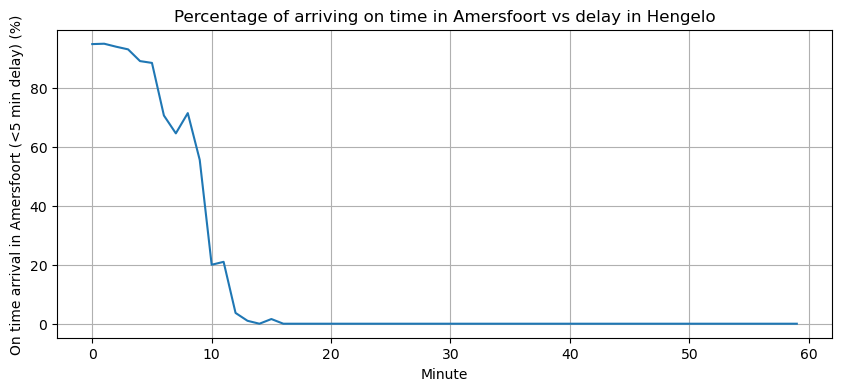

In [14]:
minutes = list(range(60))
trains = trains_to_keep2   # [242, 240, 146, 144, 142, 140]

# lege matrix: rijen = minuten, kolommen = treinen
matrix2 = pd.DataFrame(index=minutes, columns=trains)

# vullen
for i in minutes:
    for train in trains:
        matrix2.at[i, train] = percentages.get((i, train), None)

# gemiddelde per minuut (rij)
matrix2["gemiddelde"] = matrix2.mean(axis=1)

# plot van de gemiddelde kolom
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(matrix2.index, matrix2["gemiddelde"])
plt.xlabel("Minute")
plt.ylabel("On time arrival in Amersfoort (<5 min delay) (%)")
plt.title("Percentage of arriving on time in Amersfoort vs delay in Hengelo")
plt.savefig("average_delay_chance_per_minute.png")
plt.grid(True)
plt.show()

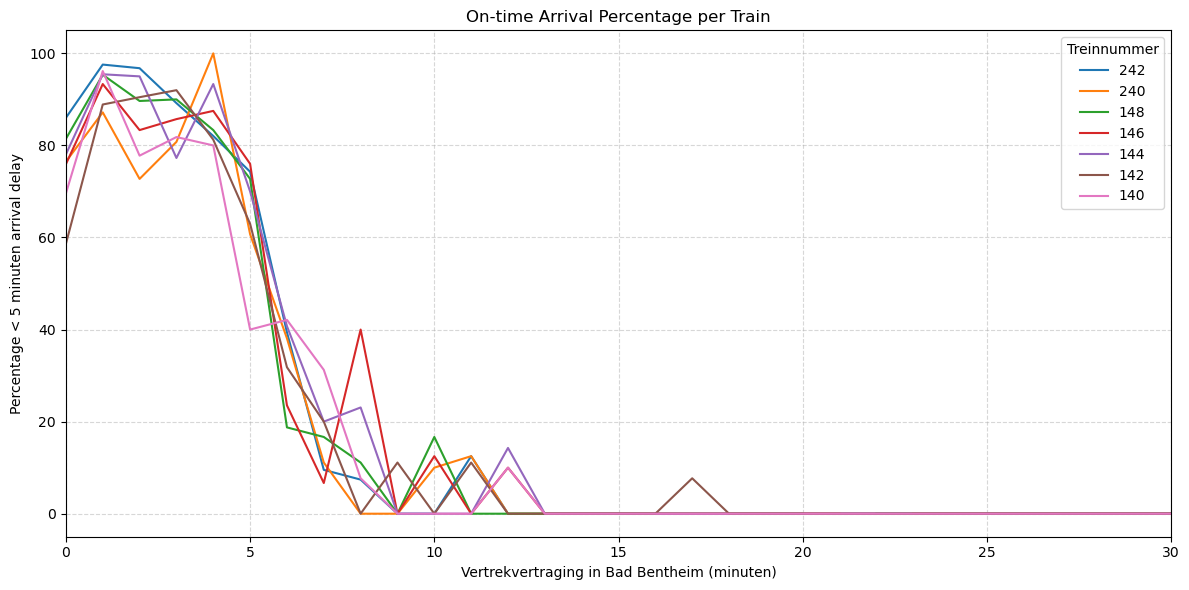

In [49]:
# Stel je matrix2 opnieuw in als DataFrame met numerieke waarden
# Vervang None door NaN zodat matplotlib ze kan negeren
matrix2 = matrix2.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(12,6))

# Plot elke trein als aparte lijn
for train in matrix2.columns:
    plt.plot(matrix2.index, matrix2[train], label=str(train))

plt.xlabel("Vertrekvertraging in Bad Bentheim (minuten)")
plt.ylabel("Percentage < 5 minuten arrival delay")
plt.title("On-time Arrival Percentage per Train")
plt.legend(title="Treinnummer")
plt.xlim(0, 30)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()